# Unleashing the Power of LLMs in Data Analysis: A New Era of Insights
# EDA

- Author: **Monish K M**
- https://github.com/MonishKMGowda/Power-of-LLMs-in-Data-Analysis

## Introduction

In this, we can explore how to leverage LLM (Large Language Models) to do Exploratory Data Analysis (EDA), which is an important step in developing machine learning models.


## Dataset:

This dataset contains information on customer orders for various products, primarily motorcycles, from a fictional company. Each record in the dataset represents a single order, providing comprehensive details about the order and the customer. The dataset includes unique identifiers for orders and products, customer contact information, geographical location, and details about the sales territory. Additionally, it captures financial aspects such as the Manufacturer's Suggested Retail Price (MSRP) and the size of the deal, categorized as Small, Medium, or Large. This dataset can be used for analyzing customer demographics, sales trends, and geographical distribution of orders.

- ORDERNUMBER: Unique identifier for each order
- PRODUCTLINE: Category of the product (e.g., Motorcycles)
- MSRP: Manufacturer's Suggested Retail Price
- PRODUCTCODE: Unique code for each product
- CUSTOMERNAME: Name of the customer who placed the order
- PHONE: Customer's phone number

### Import required libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO
import json
import io

### Define the LLM Model(ask_llm) with Model ID and Required keys

### Read the dataset 

In [26]:
# GitHub CSV file URL
github_url = 'https://raw.githubusercontent.com/MonishKMGowda/Power-of-LLMs-in-Data-Analysis/main/customer.csv'

# Fetch the content from URL
response = requests.get(github_url)

# Check if request was successful
if response.status_code == 200:
    # Read CSV data
    csv_data = StringIO(response.text)
    df = pd.read_csv(csv_data, index_col=0)
    print("Done Reading File")
else:
    print(f"Failed to fetch data from {github_url}, status code: {response.status_code}")

Done Reading File


## Getting Metadata

### How many rows and columns?

In [64]:
ask_llm("how many records are there?")

2823


#### Validate with our code

In [35]:
#checking
df.shape

(2823, 15)

In [65]:
ask_llm("how many rows and how many columns are there?")

There are 2823 rows and 15 columns in the DataFrame.


### Looking at few records

In [66]:
ask_llm("give 5 sample records and display")

                  PRODUCTLINE  MSRP PRODUCTCODE                  CUSTOMERNAME  \
ORDERNUMBER                                                                     
10278            Classic Cars   141    S18_1129            Signal Gift Stores   
10330             Motorcycles    69    S24_2360               Cruz & Sons Co.   
10303            Vintage Cars    60    S18_2248    Iberia Gift Imports, Corp.   
10305        Trucks and Buses   127    S24_2300          Marta's Replicas Co.   
10382            Classic Cars   207    S12_1108  Mini Gifts Distributors Ltd.   

                      PHONE                                ADDRESSLINE1  \
ORDERNUMBER                                                               
10278            7025551838                             8489 Strong St.   
10330        +63 2 555 3587  15 McCallum Street - NatWest Center #13-03   
10303        (95) 555 82 82                               C/ Romero, 33   
10305            6175558555                         39323

### Finding missing values

In [70]:
ask_llm("Are there any missing values in the dataset? , if yes give me the column names and count of missing values")

ADDRESSLINE2: 2521 missing values
STATE: 1486 missing values
POSTALCODE: 76 missing values
TERRITORY: 1074 missing values


### Finding Frequencies of Variables

In [71]:
ask_llm('what are the unique values in the column State?')

['NY' nan 'CA' 'Victoria' 'NJ' 'CT' 'MA' 'PA' 'NSW' 'Queensland' 'BC'
 'Tokyo' 'NH' 'Quebec' 'Osaka' 'Isle of Wight' 'NV']


In [73]:
ask_llm('What are the frequencies of the unique values in the column Country?')

COUNTRY
USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: count, dtype: int64


In [74]:
#Checking
df.COUNTRY.value_counts()

COUNTRY
USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: count, dtype: int64

In [75]:
ask_llm('''if the value in MSRP column is greater than 100, then it indicate the order is in priority. 
Then how many orders are in priority?''')

1268


In [76]:
#checking
df[df['MSRP'] > 100].shape[0]

1268

### Customer Analysis

In [77]:
ask_llm('What are the top 5 CUSTOMERNAMEs with the highest number of orders?')

CUSTOMERNAME
Euro Shopping Channel           259
Mini Gifts Distributors Ltd.    180
Australian Collectors, Co.       55
La Rochelle Gifts                53
AV Stores, Co.                   51
Name: count, dtype: int64


In [78]:
ask_llm('What is the most frequent CITY for orders?')

The most frequent CITY for orders is Madrid


In [80]:
#checking
df['CITY'].value_counts().idxmax()

'Madrid'

In [79]:
ask_llm('What is the average MSRP for customers in different TERRITORY regions?')

TERRITORY
APAC      99.515837
EMEA     100.363895
Japan    104.421488
Name: MSRP, dtype: float64


In [81]:
#checking
df.groupby('TERRITORY')['MSRP'].mean()

TERRITORY
APAC      99.515837
EMEA     100.363895
Japan    104.421488
Name: MSRP, dtype: float64

### Geographical Analysis

In [82]:
ask_llm('How many orders are there per CITY and STATE in the USA?')

             CITY STATE  ORDER_COUNT
0       Allentown    PA           31
1          Boston    MA           44
2      Brickhaven    MA           47
3     Bridgewater    CT           25
4        Brisbane    CA           15
5         Burbank    CA           13
6      Burlingame    CA           34
7       Cambridge    MA           38
8        Glendale    CA            3
9        Glendale    CT           19
10      Las Vegas    NV           29
11    Los Angeles    CA           14
12            NYC    NY          152
13         Nashua    NH           34
14    New Bedford    MA           61
15      New Haven    CT           17
16         Newark    NJ           21
17       Pasadena    CA           30
18   Philadelphia    PA           44
19      San Diego    CA           25
20  San Francisco    CA           62
21       San Jose    CA           40
22     San Rafael    CA          180
23   White Plains    NY           26


## Univariate Analysis

Univariate analysis in exploratory data analysis focuses on analyzing a single variable at a time. It involves examining the distribution, central tendency, dispersion, and other statistical properties of a single variable without considering its relationship with other variables. The main objective of univariate analysis is to understand the characteristics and patterns of individual variables in isolation.

In [92]:
ask_llm("What is the distribution of MSRP (Manufacturer's Suggested Retail Price) across all products?")

count    2823.000000
mean      100.715551
std        40.187912
min        33.000000
25%        68.000000
50%        99.000000
75%       124.000000
max       214.000000
Name: MSRP, dtype: float64


In [93]:
ask_llm("Can you describe the deal sizes represented in the dataset and their frequency?")

DEALSIZE
Medium    1384
Small     1282
Large      157
Name: count, dtype: int64


In [94]:
ask_llm("What are the most common product codes in the dataset, and how frequently do they appear?")

PRODUCTCODE
S18_3232    52
S10_1949    28
S24_1444    28
S10_4962    28
S24_2840    28
            ..
S18_1749    22
S24_2887    22
S24_3969    22
S18_4409    22
S18_4933    22
Name: count, Length: 109, dtype: int64


### Generating a Plots

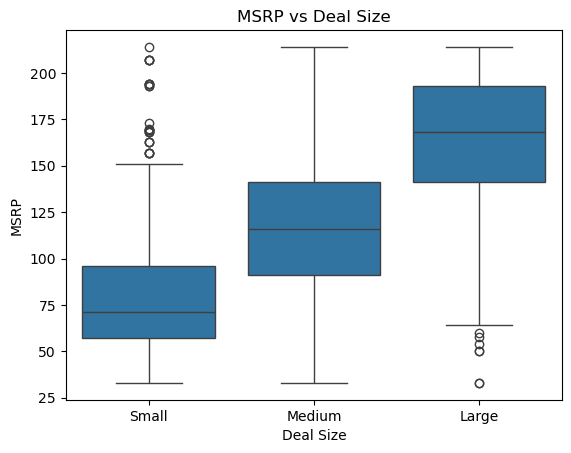

The boxplot shows the variation of MSRP across different deal sizes (Small, Medium, Large).


In [95]:
ask_llm("How does the MSRP vary across different deal sizes (Small, Medium, Large)? give boxplot")

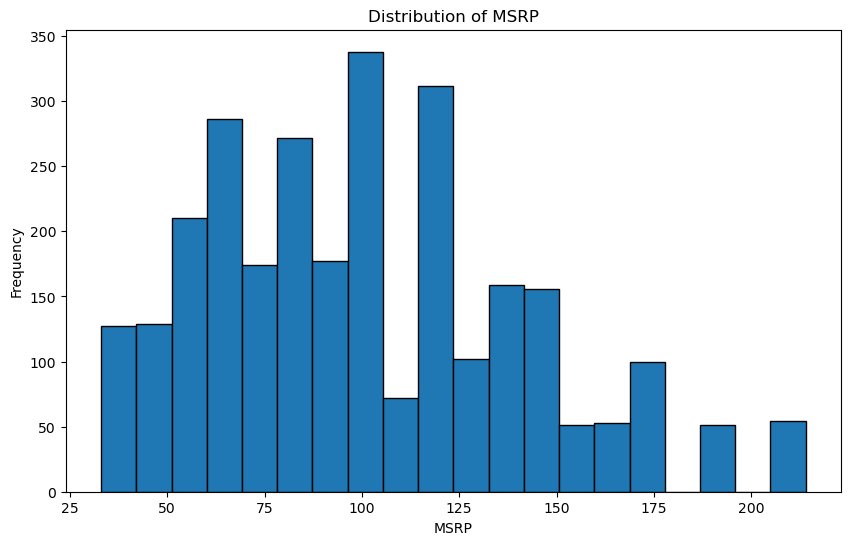

The distribution of MSRP is shown in the histogram.


In [99]:
ask_llm("What is the distribution of MSRP (Manufacturer's Suggested Retail Price)? give histogram")

### Finding outliers

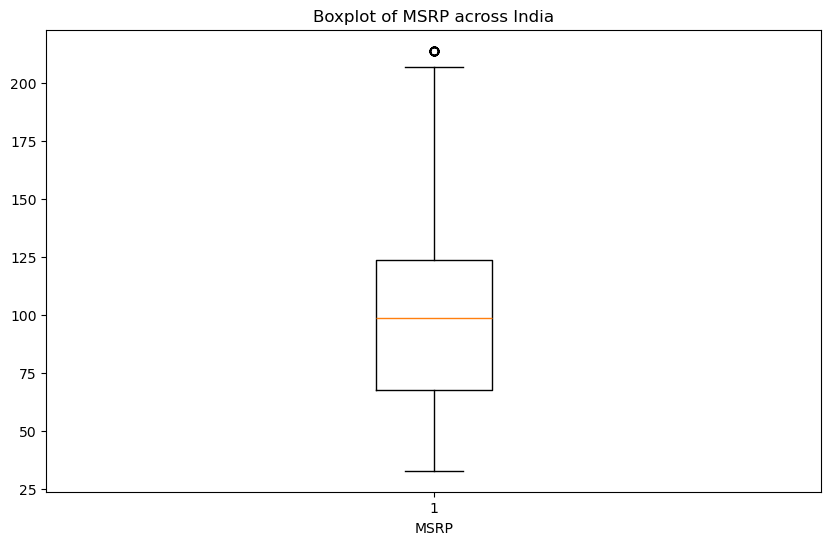

Minimum MSRP: 33
Maximum MSRP: 214

Potential outliers in MSRP:
             MSRP                    CUSTOMERNAME
ORDERNUMBER                                      
10103         214              Baane Mini Imports
10112         214        Volvo Model Replicas, Co
10126         214      Corrida Auto Replicas, Ltd
10140         214            Technics Stores Inc.
10150         214         Dragon Souveniers, Ltd.
10163         214            Classic Legends Inc.
10174         214     Australian Gift Network, Co
10183         214         Classic Gift Ideas, Inc
10194         214          Saveley & Henriot, Co.
10206         214  Canadian Gift Exchange Network
10215         214     West Coast Collectables Co.
10228         214      Cambridge Collectables Co.
10245         214                Super Scale Inc.
10258         214         Tokyo Collectables, Ltd
10270         214       Souveniers And Things Co.
10280         214              Amica Models & Co.
10291         214         Scandinavi

In [102]:
ask_llm("Can you identify any outliers in the distribution of MSRP across India? Visualize using a boxplot.")

## Things to try:

1. What is the probability that a person with no family history will suffer from chd?
2. Find out outliers in terms of alcohol consumption for those who are suffering fro chd using both standard deviation and box plot approach.
3. Create a scatter plot between age and ldl
4. Find out the correlation between age and sbp for those suffering from chd.
5. Create a heatmap showing correlation among a set of variables with divergent colors for positive and negative correlations. 